## Download Historical Data About Various Coins

In [79]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                    \
Ticker       ADA-USD     BNB-USD        BTC-USD   DOT-USD      ETH-USD   
Date                                                                     
2016-01-01       NaN         NaN     434.334015       NaN          NaN   
2016-01-02       NaN         NaN     433.437988       NaN          NaN   
2016-01-03       NaN         NaN     430.010986       NaN          NaN   
2016-01-04       NaN         NaN     433.091003       NaN          NaN   
2016-01-05       NaN         NaN     431.959991       NaN          NaN   
...              ...         ...            ...       ...          ...   
2025-01-05  1.093467  709.258301   98314.960938  7.679115  3634.103760   
2025-01-06  1.094124  729.400085  102078.085938  7.766676  3688.611328   
2025-01-07  0.992010  697.368896   96922.703125  7.015230  3381.577393   
2025-01-08  0.948031  695.837158   95043.523438  6.761236  3326.329346   
2025-01-09  0.910089  699.837036   93377.414062  6.681855  3296.549805   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-05  0.516061  213.393631  2.399727  1.093467  709.258301  ...   
2025-01-06  0.523440  218.723129  2.418807  1.094124  729.400085  ...   
2025-01-07  0.470071  202.230255  2.272350  0.992010  697.368896  ...   
2025-01-08  0.462149  197.559052  2.375305  0.948031  695.837158  ...   
2025-01-09  0.461290  190.957397  2.303201  0.910089  699.837036  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-05  216.622757  2.419580  1.241264e+09  1.411809e+09  20525254825   
2025-01-06  213.394836  2.399726  1.303664e+09  2.056634e+09  51823432705   
2025-01-07  218.412933  2.418794  2.238100e+09  2.200353e+09  58685738547   
2025-01-08  202.227875  2.272360  1.978553e+09  2.189465e+09  63875859171   
2025-01-09  197.576294  2.374879  1.825406e+09  1.990228e+09  62902648832   

Price                                                                         
Ticker          DOT-USD       ETH-USD  MATIC-USD       SOL-USD       XRP-USD  
Date                                                                          
2016-01-01          NaN           NaN        NaN           NaN           NaN  
2016-01-02          NaN           NaN        NaN           NaN           NaN  
2016-01-03          NaN           NaN        NaN           NaN           NaN  
2016-01-04          NaN           NaN        NaN           NaN           NaN  
2016-01-05          NaN           NaN        NaN           NaN           NaN  
...                 ...           ...        ...           ...           ...  
2025-01-05  233645715.0  1.283031e+10  3598448.0  2.403765e+09  4.125626e+09  
2025-01-06  376165033.0  2.397357e+10  5030571.0  3.408035e+09  4.38380

In [80]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [81]:
px_data = get_price_data_for_universe('4h', '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,94156.35000000,95277.71000000,93793.13000000,95152.56000000,2.11695000,2025-01-08 23:59:59.999,199955.04192040,389,0.76686000,72578.34527800,0
2025-01-09 00:00:00,95155.18000000,95407.60000000,93856.56000000,94230.78000000,2.07111000,2025-01-09 03:59:59.999,196588.31780360,456,1.24537000,118423.45482870,0
2025-01-09 04:00:00,94230.77000000,94624.23000000,93274.83000000,93274.83000000,3.94325000,2025-01-09 07:59:59.999,370724.55428380,351,0.32633000,30699.50976890,0


In [82]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq='4h'))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,95152.56,3326.49,0.94660,695.3400,2.38090,6.758,0.4661,198.23
2025-01-09 00:00:00,94230.78,3326.17,0.93670,696.4600,2.35230,6.725,0.4564,194.73
2025-01-09 04:00:00,93274.83,3295.59,0.91280,690.5400,2.30660,6.572,0.4564,190.49
2025-01-09 08:00:00,93491.81,3304.62,0.91050,698.4400,2.30340,6.683,0.4617,190.81


In [83]:
volume_dict = dict()

for coin in px_data:
    volume_dict[coin] = px_data[coin]["volume"]

volume_df = pd.DataFrame(volume_dict).astype(float)
volume_df = volume_df.reindex(pd.date_range(volume_df.index[0], volume_df.index[-1], freq='4h'))
volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,12.760445,116.96768,102547.5,178.050,413589.5,NaN,NaN,NaN
2020-01-01 04:00:00,1.111320,30.72021,123837.9,142.290,20155.3,NaN,NaN,NaN
2020-01-01 08:00:00,2.097358,67.41356,16867.6,452.150,29685.1,NaN,NaN,NaN
2020-01-01 12:00:00,7.531506,104.17904,24119.6,146.060,2491.5,NaN,NaN,NaN
2020-01-01 16:00:00,5.494401,24.96585,25282.5,188.870,24935.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,2.116950,14.03690,216193.7,27.707,190214.0,441.09,8617.7,766.722
2025-01-09 00:00:00,2.071110,15.39360,123357.0,20.996,95094.0,382.88,3345.9,411.600
2025-01-09 04:00:00,3.943250,13.94520,37518.0,27.854,39815.0,277.14,1965.5,194.293
2025-01-09 08:00:00,2.255370,16.56610,56845.4,166.553,75632.0,223.59,936.1,1337.548


In [84]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,0.008383,0.011635,0.032842,0.014266,0.028111,0.014715,0.021030,0.017556
2025-01-09 00:00:00,-0.009687,-0.000096,-0.010458,0.001611,-0.012012,-0.004883,-0.020811,-0.017656
2025-01-09 04:00:00,-0.010145,-0.009194,-0.025515,-0.008500,-0.019428,-0.022751,0.000000,-0.021774
2025-01-09 08:00:00,0.002326,0.002740,-0.002520,0.011440,-0.001387,0.016890,0.011613,0.001680


### Convenience Functions

In [85]:
# Calculate net returns when taking into account transaction costs. We assume transaction costs of 20 bps per
# share of turnover representing the sum of commissions to brokers and slippage paid to market makers. We
# ignore the fixed cost of the bid-ask spread also normally paid to market makers (assuming this is only about
# 1 bp in general).

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

## Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [86]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [87]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        
        # shift the holdings to use information from the previous days to avoid look-ahead bias
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [88]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,0.093750,0.031250,-0.218750,0.156250,0.218750,-0.15625,-0.03125,-0.09375
2025-01-09 00:00:00,-0.031250,0.093750,-0.218750,0.156250,0.218750,-0.15625,0.03125,-0.09375
2025-01-09 04:00:00,-0.093750,0.093750,-0.218750,0.156250,0.218750,-0.15625,-0.03125,0.03125
2025-01-09 08:00:00,-0.093750,0.031250,-0.218750,0.093750,0.218750,-0.15625,0.15625,-0.03125


In [89]:
def get_strat_1_gross_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_gross_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.475041,-0.249891,0.252080,0.092735,-0.903648,-0.824397,-0.903648,-1.084446,-1.669560
2025-01-09 00:00:00,-1.654092,-1.064933,-1.690232,-1.504461,-1.285662,0.720296,0.426632,0.426632,0.299444
2025-01-09 04:00:00,0.100374,-1.229660,1.844960,0.564552,1.502426,1.082961,1.095124,1.281353,-0.154353
2025-01-09 08:00:00,0.896221,1.146161,0.277181,0.124228,0.124228,0.113413,-0.299463,-0.006832,-0.006832


In [90]:
def get_strat_1_net_returns(strat_1_holdings, ret):
    #get_net_return(strat_holdings, ret)
    strat_1_net_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_net_ret[t] = get_net_return(strat_1_holdings[t], ret)
    
    return pd.DataFrame(strat_1_net_ret)

strat_1_gross_daily_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_daily_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.475041,-0.249891,0.252080,0.092735,-0.903648,-0.824397,-0.903648,-1.084446,-1.669560
2025-01-09 00:00:00,-1.654092,-1.064933,-1.690232,-1.504461,-1.285662,0.720296,0.426632,0.426632,0.299444
2025-01-09 04:00:00,0.100374,-1.229660,1.844960,0.564552,1.502426,1.082961,1.095124,1.281353,-0.154353
2025-01-09 08:00:00,0.896221,1.146161,0.277181,0.124228,0.124228,0.113413,-0.299463,-0.006832,-0.006832


In [91]:
import numpy as np

def get_strat_1_sr(strat_1_daily_ret):
    return strat_1_daily_ret.mean() / strat_1_daily_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_sr = get_strat_1_sr(strat_1_gross_daily_ret)
strat_1_gross_sr

1    -2.642561
2    -0.706792
3     0.108816
4     0.873880
5     1.235887
6     0.623717
12    1.418207
18    1.553115
24    1.412020
dtype: float64

<Axes: title={'center': 'Sharpe Ratio Over Different Horizons Without Transaction Costs'}, xlabel='Number of look-back periods in increments of 4 hours', ylabel='Sharpe Ratio'>

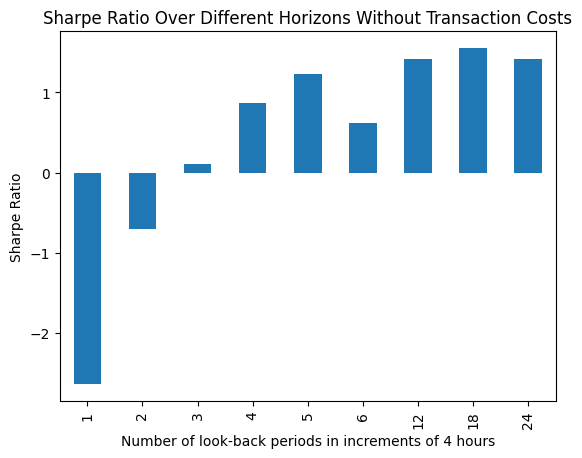

In [92]:
strat_1_gross_sr.plot(kind="bar", title="Sharpe Ratio Over Different Horizons Without Transaction Costs",
                xlabel="Number of look-back periods in increments of 4 hours",
                ylabel="Sharpe Ratio")

As we saw in the lectures, when we ignore transaction costs, we observe reversal at lower granularities (4 hours and 8 hours) but momentum at higher granularities (12 hours and higher).

In [93]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('YE')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_annual_sr = get_strat_1_annual_sr(strat_1_gross_daily_ret)
strat_1_gross_annual_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,-0.810130,5.252233,1.133151,7.791744,4.393711,7.363085,6.712885,6.555659,1.952545


<Axes: title={'center': 'Sharpe Ratio Over Different Time Horizons Grouped By Year'}, xlabel='Year, number of lookback periods in increments of 4 hours', ylabel='Sharpe Ratio'>

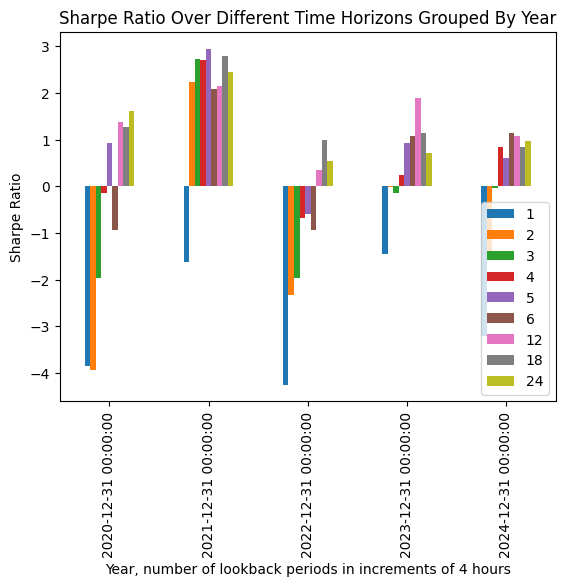

In [94]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_gross_annual_sr.iloc[:-1].plot(kind='bar',
                                       title="Sharpe Ratio Over Different Time Horizons Grouped By Year",
                                       xlabel="Year, number of lookback periods in increments of 4 hours",
                                       ylabel="Sharpe Ratio")

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.54) prior to
transaction costs.

### Strategy 1 With Transaction Costs

In [95]:
strat_1_net_daily_ret = get_strat_1_net_returns(strat_1_holdings, ret)
strat_1_net_daily_ret

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281
2020-01-01 12:00:00,-0.000485,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
2020-01-01 16:00:00,-0.001334,-0.001384,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.003551,-0.001685,-0.000809,-0.001746,-0.003226,-0.002259,-0.003226,-0.002971,-0.005324
2025-01-09 00:00:00,-0.007282,-0.003918,-0.005131,-0.004872,-0.005022,0.001473,0.000919,0.000919,-0.000180
2025-01-09 04:00:00,-0.003725,-0.006119,0.003555,0.000547,0.003616,0.002467,0.002750,0.002761,-0.001423
2025-01-09 08:00:00,0.000205,0.000390,-0.000991,-0.000410,-0.000160,-0.000439,-0.001070,-0.000519,-0.001019


In [96]:
strat_1_net_sr = get_strat_1_sr(strat_1_net_daily_ret)
strat_1_net_sr

1    -20.722480
2    -13.340356
3    -10.399631
4     -8.108828
5     -6.953509
6     -6.881619
12    -3.963584
18    -2.865631
24    -2.363518
dtype: float64

<Axes: title={'center': 'Sharpe Ratio For Strategy 1 Over Different Time Horizons'}>

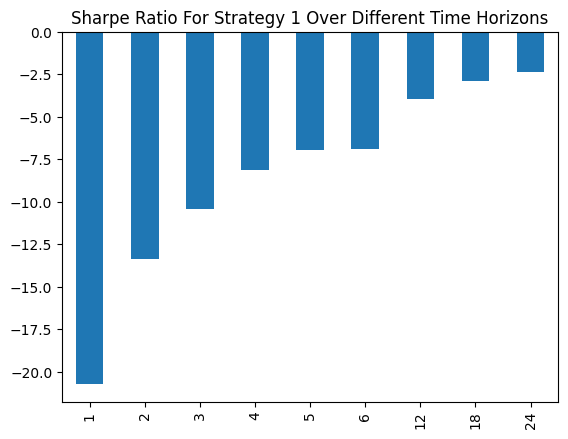

In [97]:
strat_1_net_sr.plot(kind='bar', title='Sharpe Ratio For Strategy 1 Over Different Time Horizons')

In [98]:
strat_1_annual_net_sr = get_strat_1_annual_sr(strat_1_net_daily_ret)
strat_1_annual_net_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-21.031334,-15.876341,-12.148299,-8.827155,-7.039332,-8.455215,-3.844958,-2.983348,-1.937347
2021-12-31,-13.451890,-5.703690,-3.803441,-2.787537,-2.003517,-2.446949,-1.125253,0.094664,0.260063
2022-12-31,-27.725324,-19.434049,-16.117718,-12.932315,-11.718566,-10.854681,-6.747374,-4.759926,-4.681088
2023-12-31,-28.993467,-20.106422,-17.059185,-14.046659,-11.807085,-10.529522,-6.491970,-5.637473,-5.274245
2024-12-31,-26.597023,-18.965743,-14.252453,-11.360359,-10.804976,-9.221851,-6.346870,-5.174634,-4.317617
2025-12-31,-22.884925,-11.420107,-13.066162,-4.706172,-6.200844,-1.774476,-1.143134,0.491739,-3.713078


<Axes: title={'center': 'Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year'}>

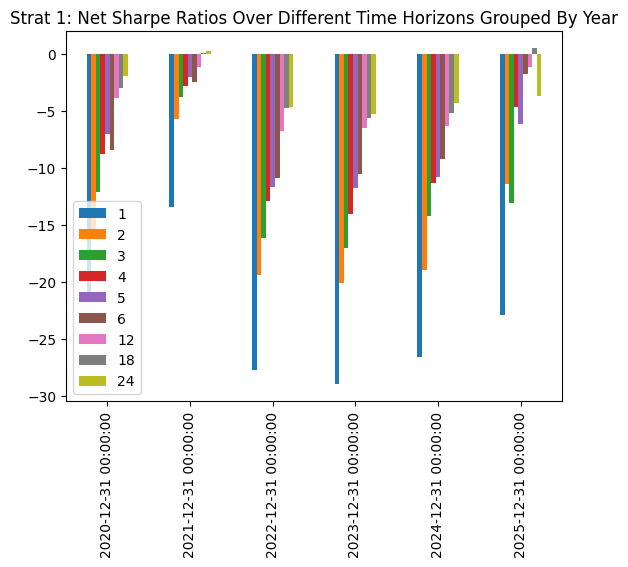

In [99]:
strat_1_annual_net_sr.plot(kind='bar',
                           title='Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year')

When transaction costs are taken into account, the strategy is no longer profitable.

## Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

Similarly to strategy 1, long high-performing coins based on average 
returns and short low-performing coins averaged over different intervals
but only do this for the top 2 and bottom 2 coins. This is similar to 
the strategy from the course where only the top and bottom deciles were
kept in the portfolio.

In [100]:
def get_strat_2_signal(ret, window_look_back):
    rolling_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1)
    rolling_pct_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1, pct=True)
    positions = ((rolling_pct_ranks > 0.81) | (rolling_pct_ranks < 0.26))
    demeaned_positions = rolling_ranks[positions].subtract(rolling_ranks[positions].mean(axis=1), axis=0)
    return demeaned_positions.divide(demeaned_positions.abs().sum(axis=1), axis=0).fillna(0)

In [101]:
get_strat_2_signal(ret, 3)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.0,0.000000,0.000000,-0.500000,0.500000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.0,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,0.0,0.000000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000
2020-01-01 16:00:00,0.0,0.000000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,0.0,0.000000,-0.291667,0.000000,0.291667,-0.208333,0.000000,0.208333
2025-01-09 00:00:00,0.0,0.000000,-0.291667,0.208333,0.291667,-0.208333,0.000000,0.000000
2025-01-09 04:00:00,0.0,0.208333,0.000000,0.291667,0.000000,-0.208333,0.000000,-0.291667
2025-01-09 08:00:00,0.0,0.208333,-0.291667,0.291667,0.000000,0.000000,0.000000,-0.208333


In [102]:
def get_strat_2_signal_time_horizon_dict(ret):
    strat_2_signals_data = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_2_signals_data[t] = get_strat_2_signal(ret, t)
    
    return strat_2_signals_data

strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
strat_2_signals_data[2]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,-0.500000,0.500000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,0.000000,0.000000,0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000
2020-01-01 16:00:00,0.000000,0.000000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,0.000000,0.000000,-0.291667,0.000000,0.291667,-0.208333,0.208333,0.000000
2025-01-09 00:00:00,-0.291667,0.000000,0.291667,0.000000,0.208333,0.000000,0.000000,-0.208333
2025-01-09 04:00:00,0.000000,0.208333,-0.208333,0.291667,0.000000,0.000000,0.000000,-0.291667
2025-01-09 08:00:00,0.000000,0.000000,-0.291667,0.208333,-0.208333,0.000000,0.291667,0.000000


In [103]:
def get_strat_2_gross_returns(strat_2_signals_data, ret):
    strat_2_gross_returns_data = dict()
    for t in strat_2_signals_data:
        strat_2_gross_returns_data[t] = (strat_2_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_2_gross_returns_data)

strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
strat_2_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333
2020-01-01 12:00:00,0.002013,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920
2020-01-01 16:00:00,-0.000588,-0.000588,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.001473,-0.000788,-0.000064,-0.000788,-0.001473,-0.001473,-0.001473,-0.002627,-0.006737
2025-01-09 00:00:00,-0.002707,-0.003771,-0.003114,-0.003771,-0.003771,0.000900,0.000900,0.000900,0.000435
2025-01-09 04:00:00,0.000142,-0.003994,0.004744,0.004744,0.004744,0.004744,0.004744,0.005425,-0.002698
2025-01-09 08:00:00,0.002987,0.003943,-0.000101,-0.000805,-0.000805,-0.000769,-0.000805,0.000264,0.000264


In [104]:
def get_strat_2_net_returns(strat_2_signals_data, ret):
    strat_2_net_returns_dict = dict()
    for t in strat_2_signals_data:
        strat_2_net_returns_dict[t] = get_net_return(strat_2_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_2_net_returns_dict)

strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
strat_2_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333
2020-01-01 12:00:00,-0.001987,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080
2020-01-01 16:00:00,-0.002588,-0.004588,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.004307,-0.001955,-0.002064,-0.002788,-0.001807,-0.001473,-0.002973,-0.002627,-0.008237
2025-01-09 00:00:00,-0.005874,-0.004605,-0.003948,-0.004605,-0.004605,0.000900,0.000900,0.000566,-0.001065
2025-01-09 04:00:00,-0.003858,-0.007161,0.003911,0.003911,0.003911,0.004744,0.004744,0.004758,-0.003864
2025-01-09 08:00:00,-0.000180,0.000776,-0.002434,-0.000805,-0.000805,-0.001602,-0.000805,-0.000069,-0.001236


In [105]:
def get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day):
    strat_2_results_stats = dict()
    strat_2_results_stats["gross_mean"] = strat_2_gross_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["net_mean"] = strat_2_net_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["gross_std"] = strat_2_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["net_std"] = strat_2_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["gross_sr"] = strat_2_results_stats["gross_mean"] / strat_2_results_stats["net_mean"]
    strat_2_results_stats["net_sr"] = strat_2_results_stats["net_mean"] / strat_2_results_stats["net_std"]
    
    strat_2_results_stats_df = pd.DataFrame(strat_2_results_stats)
    return strat_2_results_stats_df
    
get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.138944,-8.078732,0.451351,0.454582,0.140981,-17.771784
2,-0.306938,-5.444811,0.451325,0.455817,0.056373,-11.945177
3,0.002315,-4.323595,0.460793,0.466132,-0.000535,-9.275467
4,0.382838,-3.407858,0.465188,0.469407,-0.112340,-7.259924
5,0.521071,-2.878263,0.458184,0.460955,-0.181037,-6.244130
6,0.345320,-2.802485,0.464789,0.468582,-0.123219,-5.980778
12,0.551360,-1.738393,0.471899,0.474414,-0.317167,-3.664294
18,0.528081,-1.334831,0.461784,0.464578,-0.395617,-2.873210
24,0.592337,-1.022211,0.462086,0.465078,-0.579467,-2.197934


In [106]:
def get_strat_2_results(ret, periods_per_day):
    strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
    strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
    strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
    return get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day)

In [107]:
# Rebalance every 4 hours

strat_2_4hr_trades = get_strat_2_results(ret, 6)
strat_2_4hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.138944,-8.078732,0.451351,0.454582,0.140981,-17.771784
2,-0.306938,-5.444811,0.451325,0.455817,0.056373,-11.945177
3,0.002315,-4.323595,0.460793,0.466132,-0.000535,-9.275467
4,0.382838,-3.407858,0.465188,0.469407,-0.112340,-7.259924
5,0.521071,-2.878263,0.458184,0.460955,-0.181037,-6.244130
6,0.345320,-2.802485,0.464789,0.468582,-0.123219,-5.980778
12,0.551360,-1.738393,0.471899,0.474414,-0.317167,-3.664294
18,0.528081,-1.334831,0.461784,0.464578,-0.395617,-2.873210
24,0.592337,-1.022211,0.462086,0.465078,-0.579467,-2.197934


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

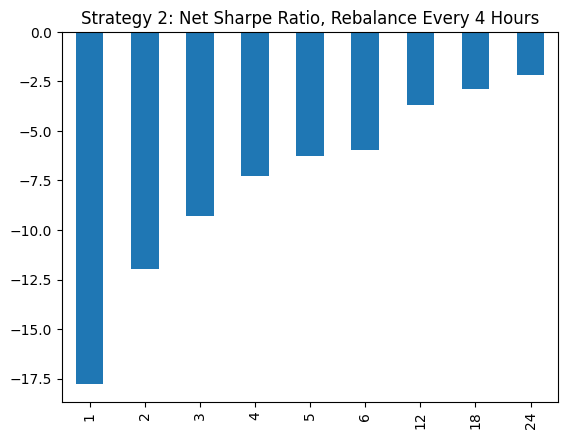

In [108]:
strat_2_4hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [109]:
# Rebalance every 8 hours

strat_2_8hr_trades = get_strat_2_results(ret.iloc[::2], 3)
strat_2_8hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.271943,-3.099112,0.328380,0.331255,-0.087749,-9.355671
2,0.417781,-2.048306,0.320187,0.322049,-0.203964,-6.360220
3,0.321164,-1.723277,0.335315,0.337770,-0.186368,-5.101922
4,0.475987,-1.290841,0.329625,0.331732,-0.368742,-3.891222
5,0.518841,-1.095593,0.333744,0.335806,-0.473571,-3.262576
6,0.572431,-0.876422,0.335894,0.337120,-0.653146,-2.599733
12,0.435626,-0.577733,0.318626,0.320347,-0.754028,-1.803461
18,0.322462,-0.518417,0.326684,0.328163,-0.622014,-1.579752
24,0.348778,-0.368141,0.330957,0.332050,-0.947402,-1.108692


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

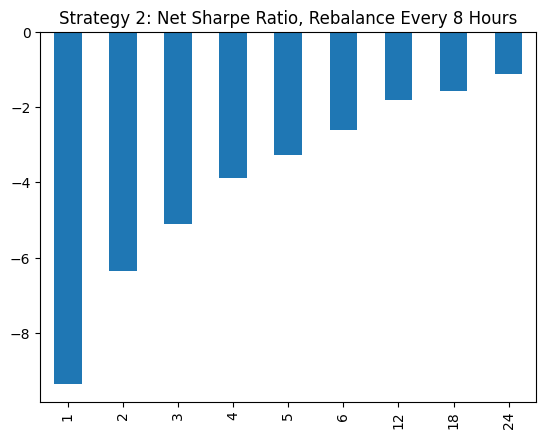

In [110]:
strat_2_8hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [111]:
# Rebalance every 12 hours

strat_2_12hr_trades = get_strat_2_results(ret.iloc[::3], 2)
strat_2_12hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.292068,-1.937270,0.267509,0.268694,-0.150763,-7.209945
2,0.107605,-1.545061,0.274248,0.275461,-0.069644,-5.609002
3,0.089221,-1.270071,0.272264,0.274289,-0.070249,-4.630415
4,0.183136,-0.985800,0.274158,0.274980,-0.185774,-3.584981
5,0.115829,-0.953731,0.275287,0.277060,-0.121448,-3.442326
6,0.073633,-0.909258,0.275073,0.276301,-0.080982,-3.290820
12,0.069055,-0.640059,0.264153,0.265310,-0.107888,-2.412492
18,0.040935,-0.549783,0.267083,0.267908,-0.074457,-2.052137
24,0.164843,-0.344231,0.280597,0.281130,-0.478871,-1.224457


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

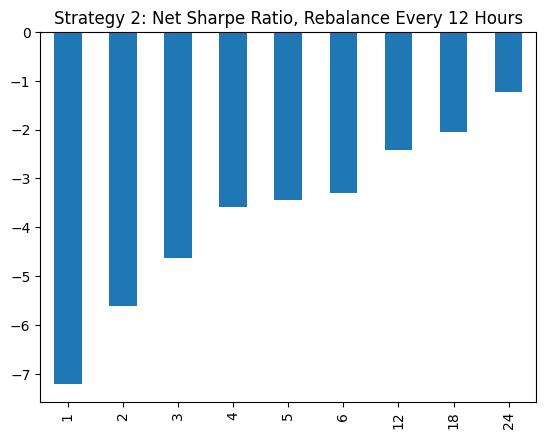

In [112]:
strat_2_12hr_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [113]:
# Rebalance once a day
strat_2_1d_trades = get_strat_2_results(ret.iloc[::6], 1)
strat_2_1d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.020332,-1.106061,0.180655,0.181830,-0.018382,-6.082950
2,0.086729,-0.728364,0.182180,0.184025,-0.119074,-3.957970
3,0.122402,-0.554686,0.180518,0.181997,-0.220669,-3.047769
4,-0.008975,-0.615194,0.180144,0.182460,0.014589,-3.371663
5,0.084182,-0.452083,0.182846,0.184243,-0.186209,-2.453729
6,0.102455,-0.387085,0.182823,0.184698,-0.264683,-2.095774
12,0.069876,-0.272753,0.190500,0.192907,-0.256188,-1.413907
18,0.120647,-0.156744,0.190124,0.191814,-0.769706,-0.817167
24,0.112714,-0.137360,0.189930,0.191615,-0.820574,-0.716854


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once A Day'}>

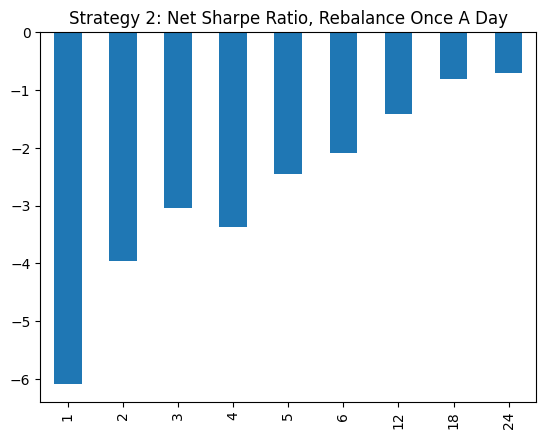

In [114]:
strat_2_1d_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Once A Day')

In [115]:
# Rebalance once every two days

strat_2_2d_trades = get_strat_2_results(ret.iloc[::12], 0.5)
strat_2_2d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.037564,-0.528735,0.130699,0.130617,-0.071044,-4.047971
2,-0.028729,-0.444667,0.129029,0.129056,0.064608,-3.445525
3,0.025503,-0.308686,0.130503,0.131977,-0.082617,-2.338937
4,-0.022002,-0.314491,0.133887,0.135547,0.069962,-2.320167
5,-0.031042,-0.291351,0.133105,0.133970,0.106544,-2.174748
6,0.002737,-0.236765,0.139000,0.140437,-0.011558,-1.685920
12,-0.007318,-0.188306,0.131484,0.131956,0.038863,-1.427031
18,0.025922,-0.111706,0.129250,0.130157,-0.232051,-0.858244
24,0.038982,-0.080669,0.119648,0.119869,-0.483232,-0.672980


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

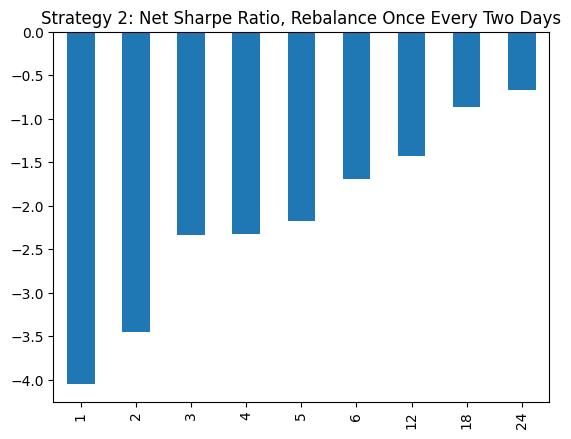

In [116]:
strat_2_2d_trades['net_sr'].plot(kind='bar',
                                 title='Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 3: Testing With The Most Recent Interval Removed

Similar to strategy 1: difference is to not include most recent 
period in rolling window.

In [117]:
def get_strat_3_signal(ret, window_look_back):
    ranked_avgs = ret.rolling(window=window_look_back, min_periods=1).mean().shift().rank(axis=1)
    demeaned_ranked_avgs = ranked_avgs.subtract(ranked_avgs.mean(axis=1), axis=0)
    return demeaned_ranked_avgs.divide(demeaned_ranked_avgs.abs().sum(axis=1), axis=0)

get_strat_3_signal(ret, 4)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.093750,-0.031250,-0.218750,0.093750,0.218750,-0.15625,0.03125,0.15625
2025-01-09 00:00:00,-0.031250,-0.093750,-0.218750,0.031250,0.218750,-0.15625,0.15625,0.09375
2025-01-09 04:00:00,-0.031250,0.031250,-0.218750,0.156250,0.218750,-0.15625,-0.09375,0.09375
2025-01-09 08:00:00,-0.031250,0.031250,-0.218750,0.156250,0.218750,-0.15625,0.09375,-0.09375


In [118]:
def get_strat_3_signal_time_horizon_dict(ret):
    strat_3_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_3_signal_dict[t] = get_strat_3_signal(ret, t)
    return strat_3_signal_dict

strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
strat_3_signals_data[4]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.093750,-0.031250,-0.218750,0.093750,0.218750,-0.15625,0.03125,0.15625
2025-01-09 00:00:00,-0.031250,-0.093750,-0.218750,0.031250,0.218750,-0.15625,0.15625,0.09375
2025-01-09 04:00:00,-0.031250,0.031250,-0.218750,0.156250,0.218750,-0.15625,-0.09375,0.09375
2025-01-09 08:00:00,-0.031250,0.031250,-0.218750,0.156250,0.218750,-0.15625,0.09375,-0.09375


In [119]:
def get_strat_3_gross_returns(strat_3_signals_data, ret):
    strat_3_gross_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_gross_returns_data[t] = (strat_3_signals_data[t] * ret).sum(axis=1)
    return pd.DataFrame(strat_3_gross_returns_data)

strat_3_gross_returns_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
strat_3_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.281039e-03,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281
2020-01-01 12:00:00,2.181741e-03,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558
2020-01-01 16:00:00,-7.816796e-07,0.000616,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-1.301481e-03,-0.000685,0.000691,0.000254,-0.002476,-0.002259,-0.002476,-0.002971,-0.004574
2025-01-09 00:00:00,-4.531758e-03,-0.002918,-0.004631,-0.004122,-0.003522,0.001973,0.001169,0.001169,0.000820
2025-01-09 04:00:00,2.749976e-04,-0.003369,0.005055,0.001547,0.004116,0.002967,0.003000,0.003511,-0.000423
2025-01-09 08:00:00,2.455401e-03,0.003140,0.000759,0.000340,0.000340,0.000311,-0.000820,-0.000019,-0.000019


In [120]:
def get_strat_3_net_returns(strat_3_signals_data, ret):
    strat_3_net_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_net_returns_data[t] = get_net_return(strat_3_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_3_net_returns_data)

strat_3_net_returns_df = get_strat_3_net_returns(strat_3_signals_data, ret)
strat_3_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784
2020-01-01 16:00:00,-0.002072,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.008667,-0.003629,-0.004687,-0.000590,-0.001422,-0.002759,-0.001720,-0.003971,-0.003821
2025-01-09 00:00:00,-0.002573,-0.004936,-0.005622,-0.003924,0.001516,0.002069,0.001516,0.002020,0.002513
2025-01-09 04:00:00,-0.006884,0.003588,0.001795,0.003008,0.002318,0.004555,0.001964,0.001964,0.001041
2025-01-09 08:00:00,-0.002007,-0.004748,-0.001714,-0.002522,-0.000266,-0.001375,-0.001691,-0.002603,-0.004470


In [121]:
def get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, periods_per_day):
    strat_3_results_stats_data = dict()
    strat_3_results_stats_data["gross_mean"] = strat_3_gross_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["net_mean"] = strat_3_net_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["gross_std"] = strat_3_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["net_std"] = strat_3_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["gross_sr"] = \
        strat_3_results_stats_data["gross_mean"] / strat_3_results_stats_data["gross_std"]
    strat_3_results_stats_data["net_sr"] = \
        strat_3_results_stats_data["net_mean"] / strat_3_results_stats_data["net_std"]
    
    return pd.DataFrame(strat_3_results_stats_data)

get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.860735,-5.613296,0.325720,0.328642,-2.642561,-17.080291
2,-0.234692,-3.721068,0.332053,0.327707,-0.706792,-11.354868
3,0.036234,-2.784940,0.332984,0.331701,0.108816,-8.395945
4,0.297348,-2.354486,0.340262,0.332260,0.873880,-7.086272
5,0.416058,-2.269028,0.336647,0.333902,1.235887,-6.795496
6,0.211621,-2.038001,0.339291,0.330027,0.623717,-6.175261
12,0.478994,-1.218884,0.337746,0.333002,1.418207,-3.660295
18,0.518007,-0.832744,0.333528,0.329416,1.553115,-2.527940
24,0.476576,-0.676332,0.337514,0.333967,1.412020,-2.025144


In [122]:
def get_strat_3_results(ret, periods_per_day):
    strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
    strat_3_gross_rets_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
    strat_3_net_rets_df = get_strat_3_net_returns(strat_3_signals_data, ret)
    return get_strat_3_results_stats(strat_3_gross_rets_df, strat_3_net_rets_df, periods_per_day)

In [123]:
# Rebalance every 4 hours
strat_3_4hr_results = get_strat_3_results(ret, 6)
strat_3_4hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.860735,-5.613296,0.325720,0.328642,-2.642561,-17.080291
2,-0.234692,-3.721068,0.332053,0.327707,-0.706792,-11.354868
3,0.036234,-2.784940,0.332984,0.331701,0.108816,-8.395945
4,0.297348,-2.354486,0.340262,0.332260,0.873880,-7.086272
5,0.416058,-2.269028,0.336647,0.333902,1.235887,-6.795496
6,0.211621,-2.038001,0.339291,0.330027,0.623717,-6.175261
12,0.478994,-1.218884,0.337746,0.333002,1.418207,-3.660295
18,0.518007,-0.832744,0.333528,0.329416,1.553115,-2.527940
24,0.476576,-0.676332,0.337514,0.333967,1.412020,-2.025144


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

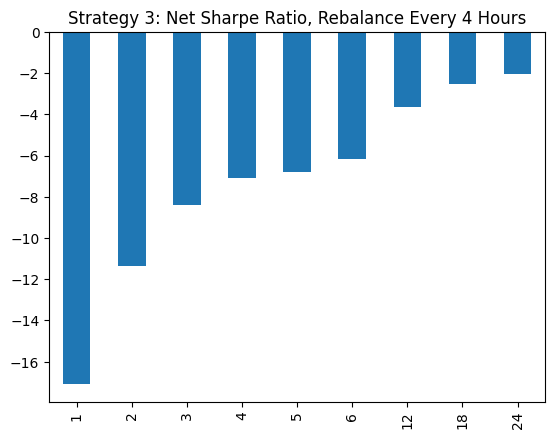

In [124]:
strat_3_4hr_results['net_sr'].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [125]:
strat_3_net_sr_by_year = strat_3_net_returns_df.resample('YE').mean() / strat_3_net_returns_df.std() * np.sqrt(365 * 6)
strat_3_net_sr_by_year

,1,2,3,4,5,6,12,18,24
2020-12-31,-19.665818,-11.801423,-8.817451,-6.105554,-7.876235,-7.466732,-3.934338,-2.198094,-0.875681
2021-12-31,-12.502937,-7.346981,-5.012903,-4.258860,-4.080966,-3.504197,-1.235318,0.172492,0.123001
2022-12-31,-18.098865,-12.867755,-9.759982,-8.493427,-7.569070,-6.895636,-4.571611,-3.101429,-2.808809
2023-12-31,-17.549398,-13.039111,-9.964811,-8.457692,-7.600925,-6.440963,-4.211768,-3.693130,-3.451302
2024-12-31,-17.621394,-11.706571,-8.517841,-8.124672,-6.932124,-6.690362,-4.447950,-3.791036,-3.070887
2025-12-31,-15.163083,-11.789302,-4.405439,-6.707014,-3.208262,-0.846115,0.653211,-3.620657,-3.807836


<Axes: >

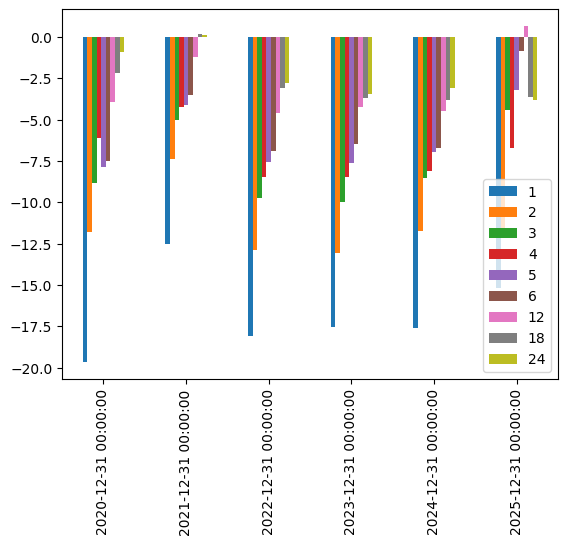

In [126]:
strat_3_net_sr_by_year.plot(kind='bar')

In [127]:
# Rebalance every 8 hours

strat_3_8hr_results = get_strat_3_results(ret.iloc[::2], 3)
strat_3_8hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.198855,-2.620135,0.238053,0.229011,0.835341,-11.441073
2,0.286782,-1.871320,0.234266,0.239830,1.224175,-7.802711
3,0.239260,-1.483708,0.243865,0.240675,0.981117,-6.164771
4,0.325586,-1.280722,0.240854,0.238393,1.351796,-5.372307
5,0.413398,-1.046115,0.242539,0.240702,1.704457,-4.346100
6,0.419822,-0.920438,0.241875,0.236004,1.735695,-3.900094
12,0.307334,-0.641705,0.230602,0.232429,1.332751,-2.760866
18,0.203392,-0.527955,0.237216,0.233851,0.857412,-2.257656
24,0.288488,-0.423143,0.238047,0.235611,1.211897,-1.795936


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

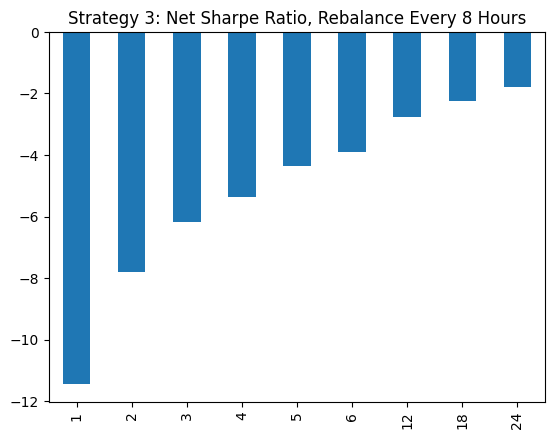

In [128]:
strat_3_8hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [129]:
# Rebalance every 12 hours

strat_3_12hr_results = get_strat_3_results(ret.iloc[::3], 2)
strat_3_12hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.212621,-1.966374,0.196358,0.199109,1.082824,-9.875883
2,0.083020,-1.390403,0.199778,0.205944,0.415559,-6.751382
3,0.070207,-1.137177,0.199534,0.198851,0.351855,-5.718750
4,0.106130,-1.031261,0.200686,0.203683,0.528837,-5.063068
5,0.057645,-0.907894,0.201766,0.203700,0.285704,-4.457014
6,0.049735,-0.832148,0.201578,0.202238,0.246730,-4.114697
12,0.075260,-0.596121,0.193891,0.194503,0.388157,-3.064848
18,0.029227,-0.439747,0.196414,0.200353,0.148803,-2.194861
24,0.154024,-0.362728,0.202613,0.199673,0.760186,-1.816614


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

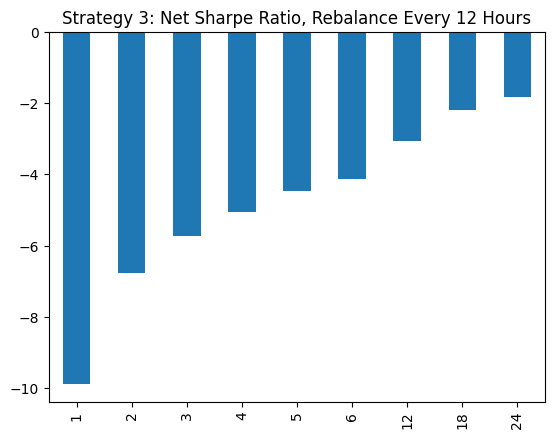

In [130]:
strat_3_12hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [131]:
# Rebalance once a day

strat_3_1d_results = get_strat_3_results(ret.iloc[::6], 1)
strat_3_1d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.007982,-0.876725,0.135553,0.129987,0.058884,-6.744709
2,0.084014,-0.551767,0.132141,0.129547,0.635787,-4.259216
3,0.057564,-0.480140,0.132141,0.126989,0.435630,-3.780970
4,-0.005216,-0.406811,0.128637,0.128105,-0.040548,-3.175602
5,0.026798,-0.328176,0.130799,0.132370,0.204876,-2.479236
6,0.046691,-0.277312,0.132903,0.132093,0.351313,-2.099378
12,0.052930,-0.137738,0.138744,0.128154,0.381495,-1.074785
18,0.108548,-0.102526,0.136482,0.133682,0.795331,-0.766941
24,0.097678,-0.073504,0.134761,0.129810,0.724821,-0.566247


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once A Day'}>

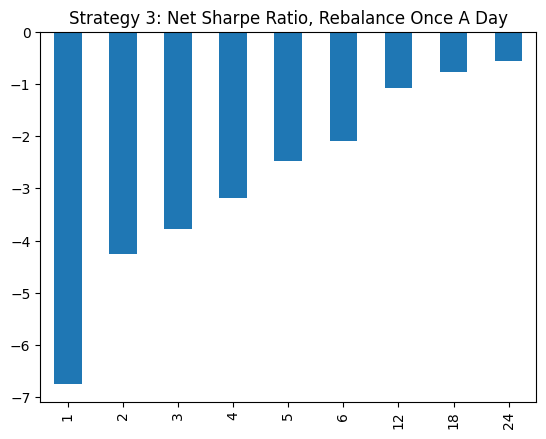

In [132]:
strat_3_1d_results['net_sr'].plot(kind='bar', title="Strategy 3: Net Sharpe Ratio, Rebalance Once A Day")

In [133]:
strat_3_2d_results = get_strat_3_results(ret.iloc[::12], 0.5)
strat_3_2d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.064036,-0.441812,0.096459,0.094680,0.663862,-4.666351
2,0.038292,-0.351580,0.096037,0.094402,0.398721,-3.724264
3,0.031890,-0.291131,0.097312,0.091609,0.327708,-3.177996
4,-0.015407,-0.263921,0.094673,0.089853,-0.162743,-2.937264
5,-0.014761,-0.216702,0.096225,0.098407,-0.153401,-2.202094
6,-0.005612,-0.208015,0.098994,0.100482,-0.056689,-2.070166
12,0.011694,-0.121198,0.099803,0.096016,0.117168,-1.262278
18,0.041637,-0.075933,0.094910,0.095635,0.438699,-0.793989
24,0.028923,-0.050748,0.097533,0.097365,0.296543,-0.521210


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

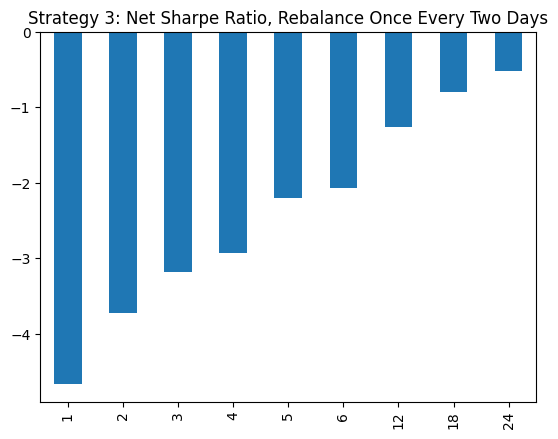

In [134]:
strat_3_2d_results['net_sr'].plot(kind='bar',
                                  title='Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 4: Trade Around Periods Of High Volume With New Information

Use high volume as a signal for high activity. When this is coupled with activity (e.g. look up on Twitter), then this could combine to yield momentum.

Try using exponential decay for the moving average: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [135]:
def get_strat_4_signal(volume_df, window_look_back):
    volume_change = (volume_df / volume_df.shift() - 1).rolling(window=window_look_back, min_periods=1).mean()
    demeaned_volume_change = volume_change.rank(axis=1).subtract(volume_change.rank(axis=1).mean(axis=1), axis=0)
    return demeaned_volume_change.divide(demeaned_volume_change.abs().sum(axis=1), axis=0)

get_strat_4_signal(volume_df, 6)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.218750,-0.093750,-0.031250,0.093750,-0.156250,0.03125,0.21875,0.15625
2025-01-09 00:00:00,-0.218750,-0.031250,-0.093750,0.093750,-0.156250,0.03125,0.21875,0.15625
2025-01-09 04:00:00,-0.156250,0.031250,-0.031250,-0.218750,-0.093750,0.09375,0.21875,0.15625
2025-01-09 08:00:00,-0.218750,-0.093750,-0.031250,0.093750,-0.156250,0.03125,0.21875,0.15625


In [136]:
def get_strat_4_signal_time_horizon_dict(volume_df):
    strat_4_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_4_signal_dict[t] = get_strat_4_signal(volume_df, t)
    return strat_4_signal_dict

strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
strat_4_signals_data[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.218750,-0.093750,-0.031250,0.093750,-0.156250,0.03125,0.21875,0.15625
2025-01-09 00:00:00,-0.218750,-0.031250,-0.093750,0.093750,-0.156250,0.03125,0.21875,0.15625
2025-01-09 04:00:00,-0.156250,0.031250,-0.031250,-0.218750,-0.093750,0.09375,0.21875,0.15625
2025-01-09 08:00:00,-0.218750,-0.093750,-0.031250,0.093750,-0.156250,0.03125,0.21875,0.15625


In [137]:
def get_strat_4_gross_returns(strat_4_signals_data, ret):
    strat_4_gross_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_gross_returns_data[t] = (strat_4_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_4_gross_returns_data)

strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
strat_4_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469
2020-01-01 12:00:00,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008
2020-01-01 16:00:00,-0.000210,-0.001239,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.000830,0.002320,0.003453,-0.000528,0.000797,0.000206,-0.001153,-0.000594,-0.000594
2025-01-09 00:00:00,-0.001227,-0.005207,-0.006550,-0.006154,-0.002981,-0.002981,-0.002644,-0.004936,-0.004491
2025-01-09 04:00:00,-0.000121,0.000685,0.001582,-0.000779,-0.000952,0.003024,0.003828,0.003164,0.002316
2025-01-09 08:00:00,0.003329,0.002708,0.001179,0.001536,0.001815,0.001815,0.003066,0.002230,0.002230


In [138]:
def get_strat_4_net_returns(strat_4_signals_data, ret):
    strat_4_net_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_net_returns_data[t] = get_net_return(strat_4_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_4_net_returns_data)

strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
strat_4_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469
2020-01-01 12:00:00,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674
2020-01-01 16:00:00,-0.002876,-0.003239,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248
...,...,...,...,...,...,...,...,...,...
2025-01-08 20:00:00,-0.004580,-0.000930,-0.000047,-0.003528,-0.001953,-0.002294,-0.002653,-0.001844,-0.001844
2025-01-09 00:00:00,-0.005227,-0.005957,-0.007050,-0.007404,-0.002981,-0.003481,-0.002644,-0.005186,-0.004491
2025-01-09 04:00:00,-0.003371,-0.003065,0.000832,-0.001029,-0.002202,0.002774,0.003328,0.002914,0.002066
2025-01-09 08:00:00,0.001829,0.001208,-0.002071,0.000536,0.001315,0.000565,0.002816,0.001980,0.002230


In [139]:
# strat_4_net_returns_df.mean()

def get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day):
    strat_4_results_stats_data = dict()
    strat_4_results_stats_data["gross_mean"] = strat_4_gross_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["gross_std"] = strat_4_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["net_mean"] = strat_4_net_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["net_std"] = strat_4_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["gross_sr"] = strat_4_results_stats_data["gross_mean"] / strat_4_results_stats_data["gross_std"]
    strat_4_results_stats_data["net_sr"] = strat_4_results_stats_data["net_mean"] / strat_4_results_stats_data["net_std"]
    return pd.DataFrame(strat_4_results_stats_data)

get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, 6)

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.055524,0.295689,-6.822051,0.297389,0.187777,-22.939822
2,0.310122,0.295537,-4.625210,0.299143,1.049352,-15.461540
3,0.197916,0.296837,-3.799901,0.300700,0.666749,-12.636869
4,0.244586,0.295988,-3.242425,0.299948,0.826335,-10.809949
5,0.296343,0.294231,-2.773045,0.297499,1.007178,-9.321187
6,0.392580,0.299746,-2.261687,0.302384,1.309709,-7.479516
12,0.234319,0.300220,-1.478404,0.301855,0.780490,-4.897737
18,0.057367,0.301890,-1.212411,0.302752,0.190028,-4.004630
24,-0.010044,0.304832,-1.018442,0.306152,-0.032950,-3.326589


In [144]:
def get_strat_4_results(ret, volume_df, periods_per_day):
    strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
    strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
    strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
    return get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day)

In [146]:
strat_4_4hr_results = get_strat_4_results(ret, volume_df, 6)
strat_4_4hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.055524,0.295689,-6.822051,0.297389,0.187777,-22.939822
2,0.310122,0.295537,-4.625210,0.299143,1.049352,-15.461540
3,0.197916,0.296837,-3.799901,0.300700,0.666749,-12.636869
4,0.244586,0.295988,-3.242425,0.299948,0.826335,-10.809949
5,0.296343,0.294231,-2.773045,0.297499,1.007178,-9.321187
6,0.392580,0.299746,-2.261687,0.302384,1.309709,-7.479516
12,0.234319,0.300220,-1.478404,0.301855,0.780490,-4.897737
18,0.057367,0.301890,-1.212411,0.302752,0.190028,-4.004630
24,-0.010044,0.304832,-1.018442,0.306152,-0.032950,-3.326589


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

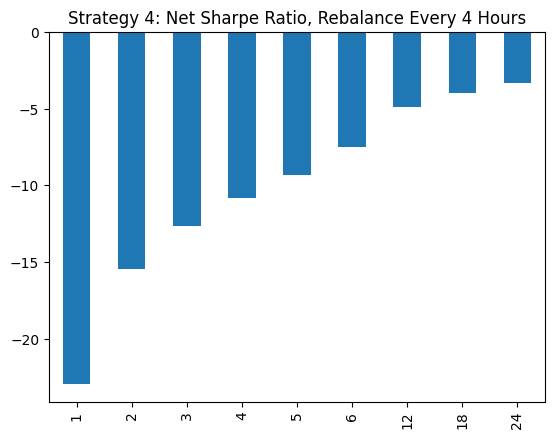

In [147]:
strat_4_4hr_results["net_sr"].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [149]:
strat_4_8hr_results = get_strat_4_results(ret[::2], volume_df[::2], 3)
strat_4_8hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.100910,0.216740,-3.422140,0.217288,0.465581,-15.749366
2,0.051958,0.213367,-2.420171,0.216005,0.243513,-11.204247
3,0.130508,0.218250,-1.720393,0.220523,0.597976,-7.801423
4,0.155243,0.217441,-1.486216,0.219833,0.713952,-6.760658
5,0.238480,0.217803,-1.232951,0.219965,1.094933,-5.605211
6,0.244786,0.219378,-0.992580,0.221231,1.115817,-4.486616
12,0.170325,0.220867,-0.600597,0.221856,0.771166,-2.707151
18,0.127950,0.214668,-0.439517,0.215512,0.596035,-2.039410
24,0.144518,0.214600,-0.322593,0.215225,0.673430,-1.498867


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

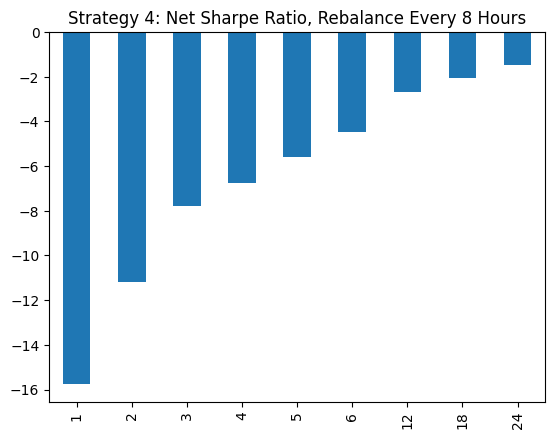

In [150]:
strat_4_8hr_results['net_sr'].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [154]:
strat_4_12hr_results = get_strat_4_results(ret[::3], volume_df[::3], 2)
strat_4_12hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.077751,0.183926,-2.287876,0.184277,0.422732,-12.415417
2,0.062867,0.185429,-1.575552,0.186362,0.339035,-8.454235
3,0.060517,0.182807,-1.312485,0.184071,0.331041,-7.130321
4,0.104365,0.183861,-1.050560,0.185385,0.567632,-5.666892
5,0.017369,0.186963,-1.029264,0.188456,0.092900,-5.461566
6,0.031925,0.187990,-0.890513,0.189239,0.169821,-4.705753
12,0.073528,0.182545,-0.521919,0.182978,0.402796,-2.852363
18,0.042211,0.184068,-0.409262,0.184104,0.229325,-2.222998
24,0.055128,0.178914,-0.303830,0.179644,0.308127,-1.691296


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

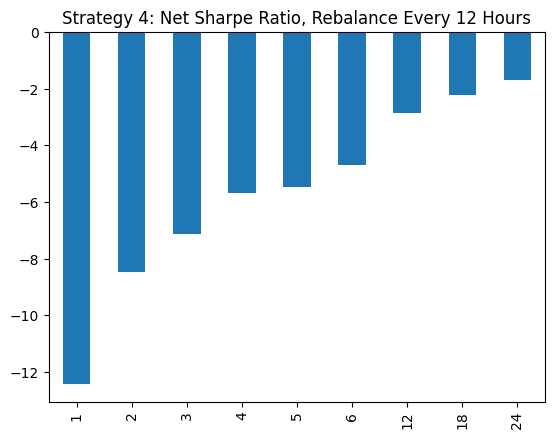

In [157]:
strat_4_12hr_results["net_sr"].plot(kind="bar",
                                    title="Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours")

In [158]:
strat_4_1d_results = get_strat_4_results(ret[::6], volume_df[::6], 1)
strat_4_1d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.048187,0.123315,-1.126447,0.123829,0.390766,-9.096802
2,-0.021862,0.127201,-0.850959,0.128275,-0.171871,-6.633859
3,0.025828,0.131771,-0.649060,0.133438,0.196007,-4.864129
4,0.002244,0.129645,-0.580455,0.130783,0.017312,-4.438312
5,0.014210,0.120206,-0.503878,0.121501,0.118215,-4.147100
6,-0.010069,0.117420,-0.479057,0.118718,-0.085756,-4.035238
12,-0.014514,0.119956,-0.313081,0.120616,-0.120993,-2.595674
18,0.014550,0.124161,-0.212981,0.124830,0.117186,-1.706178
24,0.005542,0.116468,-0.179631,0.116417,0.047583,-1.542996


In [159]:
strat_4_2d_results = get_strat_4_results(ret[::12], volume_df[::12], 0.5)
strat_4_2d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,-0.018139,0.091267,-0.602768,0.091789,-0.198749,-6.566892
2,-0.002034,0.089454,-0.411304,0.091389,-0.022742,-4.500575
3,-0.002317,0.087619,-0.323462,0.088642,-0.026449,-3.649075
4,0.020857,0.088240,-0.259512,0.088929,0.236366,-2.918190
5,0.008101,0.091059,-0.245004,0.091598,0.088967,-2.674774
6,0.010530,0.093286,-0.213738,0.094080,0.112878,-2.271869
12,0.006473,0.086803,-0.130189,0.087228,0.074572,-1.492525
18,-0.031506,0.094352,-0.134775,0.094649,-0.333923,-1.423953
24,-0.017964,0.095246,-0.107135,0.095539,-0.188605,-1.121377


In [59]:
volume_gross_returns = (ret * volume_holdings.shift()).sum(axis=1)

In [60]:
volume_gross_returns.mean() * 365 * 6

0.3926281935955861

In [61]:
get_net_return(volume_holdings.shift(), ret).mean() * 365 * 6

-2.261631280056764

In [62]:
exponential_volume_change = (volume_df / volume_df.shift() - 1).ewm(alpha=0.5).mean()
exponential_volume_change

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.287209,0.550504,-0.506657,1.384829,-0.001877,NaN,NaN,NaN
2020-01-01 12:00:00,1.603632,0.547572,0.028539,0.206661,-0.524272,NaN,NaN,NaN
2020-01-01 16:00:00,0.604107,-0.149990,0.039032,0.252761,4.559664,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 16:00:00,1.068179,2.146868,1.379772,0.364957,1.564666,2.420382,39.847196,9.547248
2025-01-08 20:00:00,0.176343,0.655734,0.443163,-0.082812,0.521823,0.794135,19.555151,4.363770
2025-01-09 00:00:00,0.077344,0.376193,0.006874,-0.162512,0.010877,0.331083,9.471705,1.950300
2025-01-09 04:00:00,0.490638,0.141051,-0.344492,0.082061,-0.285216,0.027457,4.529570,0.711172


In [63]:
demeaned_exponential_volume_change = exponential_volume_change.rank(axis=1).subtract(
    exponential_volume_change.rank(axis=1).mean(axis=1), axis=0)
exponential_volume_holdings = demeaned_exponential_volume_change.divide(demeaned_exponential_volume_change.abs().sum(axis=1), axis=0)
exponential_volume_holdings

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.166667,-0.166667,0.000000,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.333333,-0.166667,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08 16:00:00,-0.156250,0.031250,-0.093750,-0.218750,-0.031250,0.09375,0.21875,0.15625
2025-01-08 20:00:00,-0.156250,0.031250,-0.093750,-0.218750,-0.031250,0.09375,0.21875,0.15625
2025-01-09 00:00:00,-0.031250,0.093750,-0.156250,-0.218750,-0.093750,0.03125,0.21875,0.15625
2025-01-09 04:00:00,0.093750,0.031250,-0.218750,-0.031250,-0.156250,-0.09375,0.21875,0.15625


In [64]:
exponential_volume_net_returns = get_net_return(exponential_volume_holdings.shift(), ret)
exponential_volume_net_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000469
2020-01-01 12:00:00   -0.003674
2020-01-01 16:00:00   -0.003239
                         ...   
2025-01-08 16:00:00   -0.011699
2025-01-08 20:00:00   -0.002801
2025-01-09 00:00:00   -0.005255
2025-01-09 04:00:00    0.002259
2025-01-09 08:00:00   -0.000377
Freq: 4h, Length: 11013, dtype: float64

In [65]:
exponential_volume_net_returns.mean() * 365 * 6

-3.7555009849149963

In [ ]:
exponential_volume_

## Strategy 5: Pairs Trading For Cryptocurrencies (Reversal Strategy)

Observe the correlation between the different cryptocurrencies and try to apply pairs trading for highly correlated pairs.

## Strategy 6: Use XGBoost On Price Data And Volume Data

Fit a model with features taken using price data and volume data. Consider using principal component analysis.

## Strategy 7: Seasonality Across The Week

Look for seasonal patterns during the period of a week. Maybe there is similar activity consistently during:

  - weekdays versus during weekends
  - morning versus night
  - Fridays

In [171]:
np.random.seed(751)

print(1 / (102**2))

def get_min_diff(num_trials):
    total_min_diff = 0.0

    for _ in range(num_trials):
        rvs = np.random.uniform(size=101)
        rvs.sort()
        min_diff = rvs[0]
        min_diff = min(min_diff, 1 - rvs[-1])
        for index in range(len(rvs)-1):
            min_diff = min(min_diff, rvs[index+1]-rvs[index])
        total_min_diff += min_diff

    return total_min_diff / num_trials

for num_trials in [10**x for x in range(1, 7)]:
    print(f"{num_trials} trials, {get_min_diff(num_trials)}")

9.611687812379854e-05
10 trials, 6.279533187603104e-05
100 trials, 9.473426811017816e-05
1000 trials, 9.84895187032453e-05
10000 trials, 9.705341325120361e-05
100000 trials, 9.653166879815221e-05
1000000 trials, 9.617215952395997e-05
